The implementation of Naive Bayes and Logistic Regression is supposed to be from scratch.

# Naive Bayes (50)

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.

$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots, x_n \mid y)} {P(x_1, \dots, x_n)}$

$P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y)$

$P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)}{P(x_1, \dots, x_n)}$

$\begin{align}\begin{aligned}P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}{n} P(x_i \mid y)\\\Downarrow\\\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y)\end{aligned}\end{align}$

In spite of their apparently over-simplified assumptions, naive Bayes classifiers have worked quite well in many real-world situations, famously document classification and spam filtering. They require a small amount of training data to estimate the necessary parameters. 

Naive Bayes learners and classifiers can be extremely fast compared to more sophisticated methods. The decoupling of the class conditional feature distributions means that each distribution can be independently estimated as a one dimensional distribution. This in turn helps to alleviate problems stemming from the curse of dimensionality.

On the flip side, although naive Bayes is known as a decent classifier, it is known to be a bad estimator, so the probability outputs are not to be taken too seriously.

In [200]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
np.random.seed(123)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from fitter import Fitter

/home/bigwhoman/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/bigwhoman/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(


### Dataset
Load the given dataset. The last column contains the labels. 

Preprocess if needed.

In [201]:
#TODO: Load the .txt file
data = np.loadtxt('data.txt', delimiter=' ')
labels = data[:, -1]

Consider the values of each class. Create a dictionary for the dataset, with classes as keys and the entries of the dataset as values.

In [202]:
def create_class_dictionary(data, labels):
    classes = {}
    unique_labels = np.unique(labels)
    for label in unique_labels:
        classes[label] = data[labels == label]
    return classes

For the dataset dictionary, find the mean and standard deviation of all classes. The output format should be a list of two lists, the first one the mean and standard deviation of the first column and the second one is for the second column.

In [203]:
def info(data):
        class_mean = np.mean(data, axis=0)
        class_std = np.std(data, axis=0)
        return (class_mean,class_std)

In [204]:
def class_info(class_dictionary):
  for label in class_dictionary : 
    print(info(class_dictionary[label]))

### Visualization
Use the imported libraries to visualize the given data. 

Why is the info step valid in this dataset? 

What is the type of this dataset's distribution? With other distribution types, what action would be needed to obtain the mean and standard variation info?

Fitting 110 distributions:  69%|██████▉   | 76/110 [00:20<00:09,  3.57it/s]SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
Fitting 110 distributions:  77%|███████▋  | 85/110 [00:24<00:12,  1.98it/s]/home/bigwhoman/.local/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 110 distributions:  78%|███████▊  | 86/110 [00:26<00:25,  1.04s/it]/home/bigwhoman/.local/lib/p

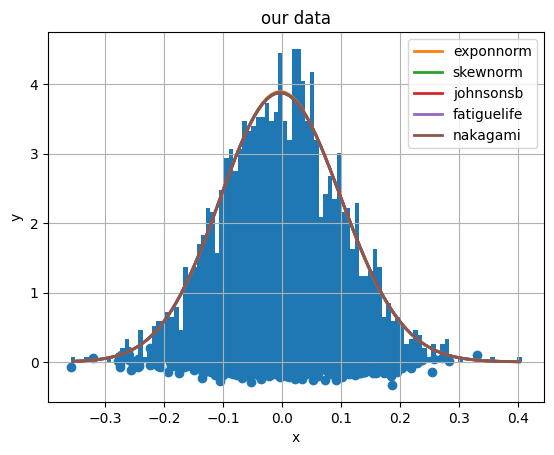

/home/bigwhoman/.local/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/home/bigwhoman/.local/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


In [205]:
#TODO
x = data[:, 0]
y = data[:, 1]
combined_data = np.concatenate((x, y))

# Fit the distributions
f = Fitter(combined_data)
f.fit()

# Show the summary of the best-fitting distributions
f.summary()


# create a scatter plot of the data
plt.scatter(x, y)

# add a title and labels to the plot
plt.title('our data')
plt.xlabel('x')
plt.ylabel('y')

# display the plot
plt.show()

### Model Details

As explained above, to create this model, you need a prior function and a likelihood function.

In the likelihood function, you need to calculate the probability of the query belonging to a class. 

In [176]:
def prior(class_dictionary, labels):
    priors = {}
    total_examples = len(labels)
    
    for label in class_dictionary:
        priors[label] = len(class_dictionary[label]) / total_examples
        
    return priors

In [177]:
def count_unique_features(data):
    unique_features = set()
    for row in data:
        unique_features.update(set(row))
    return len(unique_features)

def likelihood(class_dictionary, query, alpha=1):
    likelihoods = {}
    unique_features_count = count_unique_features(np.vstack(list(class_dictionary.values())))
    
    for label in class_dictionary:
        class_data = class_dictionary[label]
        class_mean, class_std = info(class_data)
        
        with np.errstate(divide='ignore', invalid='ignore'):
            smoothed_pdfs = norm.pdf(query, class_mean, class_std) + alpha
        
        normalized_pdfs = smoothed_pdfs / (unique_features_count + alpha * len(class_data))
        
        likelihoods[label] = np.prod(normalized_pdfs)
        
    return likelihoods


### Predict


In [178]:


def predict(data, labels, query):
    class_dictionary = create_class_dictionary(data, labels)
    priors = prior(class_dictionary, labels)
    
    likelihoods = likelihood(class_dictionary, query)
    posteriors = {}
    
    for label in class_dictionary:
        posteriors[label] = priors[label] * likelihoods[label]
        
    return max(posteriors, key=posteriors.get)


In [179]:
def NB(data, labels, queries):
    predictions = []
    for query in queries:
        predicted_label = predict(data, labels, query)
        predictions.append(predicted_label)
    return predictions


### Test
To test the model, import a suitable dataset from sklearn library to check the accuracy of your model. Then import GaussianNB from sklearn and compare your model's result with it.

In [180]:
def train_test_split_custom(data, labels, test_size):
    return train_test_split(data, labels, test_size=test_size)

In [181]:
def accuracy(ground_truth, predictions):
    return accuracy_score(ground_truth, predictions)

In [182]:
# compare with GaussianNB from sklearn
X_train, X_test, y_train, y_test = train_test_split_custom(data, labels, test_size=0.2)
predictions = NB(X_train, y_train, X_test)
our_model_accuracy = accuracy(y_test, predictions)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
sklearn_predictions = gnb.predict(X_test)
sklearn_accuracy = accuracy(y_test, sklearn_predictions)
print("Our Naive Bayes Model Accuracy:", our_model_accuracy)
print("Sklearn GaussianNB Model Accuracy:", sklearn_accuracy)

Our Naive Bayes Model Accuracy: 0.5
Sklearn GaussianNB Model Accuracy: 1.0


# Linear Regression (35)

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

Ordinary least squares Linear Regression.

LinearRegression from sklearn.linear_model fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In this section, you will implement a simple linear regression model using sklearn. Only the first feature of the diabetes dataset is required for this part.

In [183]:
from sklearn.metrics import r2_score
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [184]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
arr_column_0 = diabetes_X[:, 0]

# reshape the array to a 1x3 array
reshaped_arr = arr_column_0.reshape(1, -1)

diabetes_X = reshaped_arr[0] # Change this so that your model will use only one feature (arbitary)
diabetes_X = diabetes_X.reshape(-1,1)

Split the data into training and testing sets.

In [185]:
# you can use the train_test_split(data, labels, test_size) function from the previous section
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y)

Create the model using sklearn. Then train it using the training set.

In [186]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

Make predictions for the test set.

In [187]:
#TODO
predicted = model.predict(X_test)

Visualize your predictions and compare them to ground truth using the imported libraries.

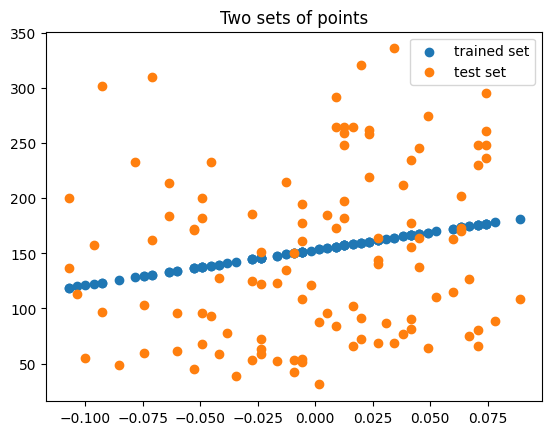

In [188]:
#TODO
mse = mean_squared_error(y_test, predicted)
plt.scatter(X_test, predicted, label='trained set')
plt.scatter(X_test, y_test, label='test set')

# add a title and legend to the plot
plt.title('Two sets of points')
plt.legend()

# display the plot
plt.show()

# Logistic Regression (15 + 50)

This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn't vote, based on a given dataset of independent variables.

$S(h(x)) = \frac{1}{1 + e^{-(\theta_0 + \theta_1 x_1 + \theta_1 x_2 + \cdots + \theta_n x_n})} = \frac{1}{1 + e^{-\theta^T x}} \tag{2}$

The sigmoid function is of importance here and is defined as:

$S(x) = \frac{1}{1 + e^{-x}}$






Calculate the sigmoid function and visualize it.

In [189]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

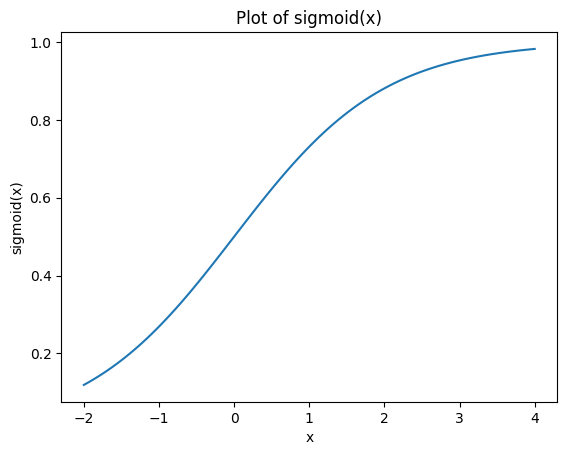

In [190]:
#TODO: visualize the sigmoid function for arbitary range of x. you can use np.linspace
# create an array of values for x
x = np.linspace(-2, 4, 100)

# evaluate the function for each value of x
y = sigmoid(x)

# plot the function
plt.plot(x, y)

# add a title and labels to the plot
plt.title('Plot of sigmoid(x)')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')

# display the plot
plt.show()

### Dataset
Load the given dataset (same as naive bayes). Add a new column at the end of the dataset containing only 1s.

In [191]:
#TODO
data = np.loadtxt('data.txt', delimiter=' ')
labels = data[:, -1]
# print(len(data))
col = np.ones((len(data),1), dtype=int)
# print(col)
data = np.concatenate([data,col],axis=1)
# print(data)

### Predictions

Simply implement the math above to make predictions. Since we are using numbers here, define the threshold of 0.5 for classification.

In [192]:
# print(sum(np.multiply(np.array([3,2,1,0]),np.array([1,5,7,3]))))
def predict(weights, x):
  #TODO
  logit = sum(np.multiply(weights,x))
  if sigmoid(logit) > 0.5 :
    return 1
  else :
    return 0

### Loss Function
Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high loss value. A perfect model would have a log loss of 0.

In binary classification, where the number of classes M
 equals 2, cross-entropy can be calculated as:

$−(ylog(p)+(1−y)log(1−p))$


In [193]:
def cross_entropy(y_true, y_pred):
  return -(y_true * np.log(y_pred) + (1-y_true) * np.log(1-y_pred))

### Gradient Descent

Gradient Descent is an optimization algorithm for finding a local minimum of a differentiable function. Gradient descent in machine learning is simply used to find the values of a function's parameters (coefficients) that minimize a cost function as far as possible.

$\theta := \theta - \alpha \nabla_\theta H \tag{6}$

In [194]:
def gradient_descent(X, y, weight, num_of_epochs, learning_rate=0.005):
    accuracies = []
    losses = []
    for epoch in range(num_of_epochs):
        y_pred = np.array([predict(weight, x) for x in X])
        accuracy = accuracy_score(y, y_pred)
        loss = np.mean(cross_entropy(y, sigmoid(np.dot(X, weight))))
        
        accuracies.append(accuracy)
        losses.append(loss)
        
        gradient = np.dot(X.T, (y_pred - y)) / y.size
        weight -= learning_rate * gradient
    return weight, accuracies, losses

In [195]:
def LR(train_set, labels, test_set, num_of_epochs, learning_rate=0.005):
    initial_weights = np.zeros(train_set.shape[1])
    trained_weights, accuracies, losses = gradient_descent(train_set, labels, initial_weights, num_of_epochs, learning_rate)
    predictions = np.array([predict(trained_weights, x) for x in test_set])
    return predictions, trained_weights, accuracies, losses

### Test

To test the model, import a suitable dataset from sklearn library to check the accuracy of your model. Then import LogisticRegression from sklearn and compare your model's result with it.



In [196]:
def accuracy(ground_truth, predictions):
    return accuracy_score(ground_truth, predictions)

In [197]:
# compare with sklearn.linear_model.LogisticRegression
train_set = data[:int(0.8 * len(data))]
train_labels = labels[:int(0.8 * len(labels))]
test_set = data[int(0.8 * len(data)):]
test_labels = labels[int(0.8 * len(labels)):]

num_of_epochs = 15
predictions, trained_weights, accuracies, losses = LR(train_set, train_labels, test_set, num_of_epochs)
print("Custom Logistic Regression Accuracy:", accuracy(test_labels, predictions))

clf = LogisticRegression()
clf.fit(train_set, train_labels)
sklearn_predictions = clf.predict(test_set)
print("Sklearn Logistic Regression Accuracy:", accuracy(test_labels, sklearn_predictions))

Custom Logistic Regression Accuracy: 1.0
Sklearn Logistic Regression Accuracy: 1.0


### Visualization

During your model's training, save the accuracy and loss of each epoch, and then plot them using the imported libraries. Explain the pattern. If the result is not satisfactory, change the learning rate, num of epochs, initial weights, etc and observe their effects on the result.

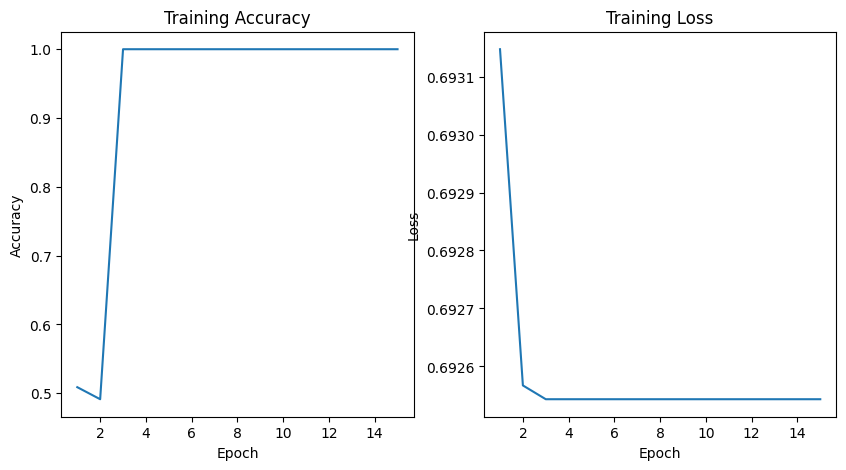

In [198]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_of_epochs+1), accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_of_epochs+1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')

plt.show()